# The Independent distribution

> In this post, we will learn the Independent distribution model. This is the summary of lecture "Probabilistic Deep Learning with Tensorflow 2" from Coursera.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Deep_Learning, Tensorflow, Probability]
- image: 

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 10)

print("Tensorflow : v" + tf.__version__)
print("Tensorflow probability : v" + tfp.__version__)

Tensorflow : v2.3.1
Tensorflow probability : v0.11.1


## Example - Rank is 1

In [2]:
tfd = tfp.distributions

mv_normal = tfd.MultivariateNormalDiag(loc=[-1., 0.5], scale_diag=[1., 1.5])
print(mv_normal)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[], event_shape=[2], dtype=float32)


In [3]:
batched_normal = tfd.Normal(loc=[-1., 0.5], scale=[1., 1.5])
print(batched_normal)

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)


In [4]:
mv_normal.log_prob([-.2, 1.8])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.9388978>

In [5]:
batched_normal.log_prob([-0.2, 1.8])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.2389386, -1.699959 ], dtype=float32)>

In [6]:
independent_normal = tfd.Independent(batched_normal, reinterpreted_batch_ndims=1)
print(independent_normal)

tfp.distributions.Independent("IndependentNormal", batch_shape=[], event_shape=[2], dtype=float32)


In [7]:
independent_normal.log_prob([-0.2, 1.8])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.9388976>

## Example - rank that is higher than 1

In [8]:
batched_normal = tfd.Normal(
    loc=[[-1, 0.5], [0., 1.], [0.3, -0.1]],
    scale=[[1., 1.5], [0.2, 0.8], [2., 1.]]
)
print(batched_normal)

tfp.distributions.Normal("Normal", batch_shape=[3, 2], event_shape=[], dtype=float32)


In [9]:
independent_normal = tfd.Independent(batched_normal, reinterpreted_batch_ndims=1)
print(independent_normal)

tfp.distributions.Independent("IndependentNormal", batch_shape=[3], event_shape=[2], dtype=float32)


In [10]:
independent_normal = tfd.Independent(batched_normal, reinterpreted_batch_ndims=2)
print(independent_normal)

tfp.distributions.Independent("IndependentNormal", batch_shape=[], event_shape=[3, 2], dtype=float32)


## Coding Tutorials

In [11]:
# Start by defining a batch of two univariate Gaussians, then
# Combine them into a bivariate Gaussian with independent components
locs = [-1., 1]
scales = [0.5, 1.]
batch_of_normals = tfd.Normal(loc=locs, scale=scales)

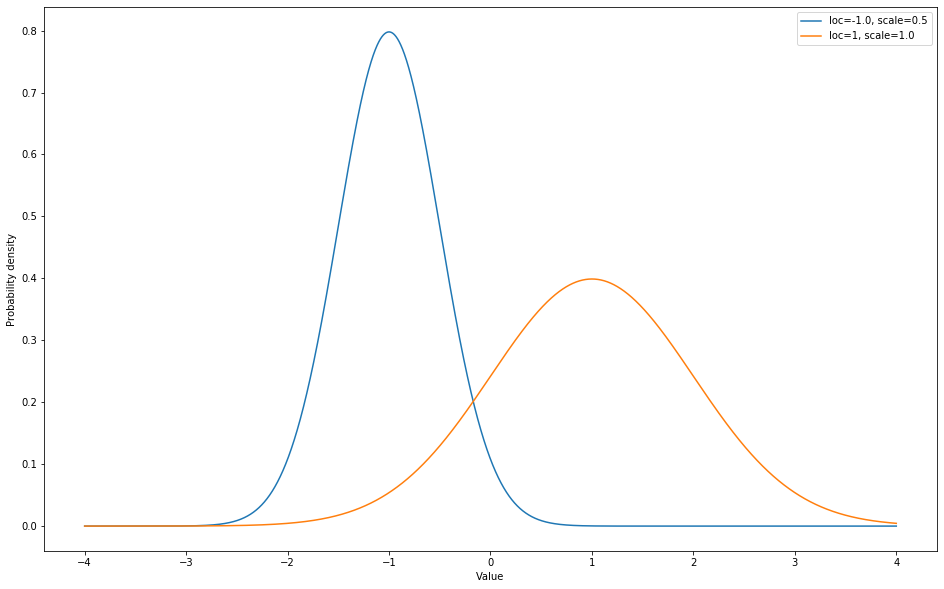

In [12]:
# Univariate density functions
import seaborn as sns

t = np.linspace(-4, 4, 10000)
densities = batch_of_normals.prob(np.repeat(t[:, tf.newaxis], 2, axis=1))

sns.lineplot(t, densities[:, 0], label='loc={}, scale={}'.format(locs[0], scales[0]))
sns.lineplot(t, densities[:, 1], label='loc={}, scale={}'.format(locs[1], scales[1]))
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend()
plt.show()

In [13]:
# Check their batch_shape and event_shape
batch_of_normals

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [14]:
# Use Independent to convert the batch shape to the event shape
bivariate_normal_from_Independent = tfd.Independent(batch_of_normals,
                                                    reinterpreted_batch_ndims=1)

In [15]:
# Note that dimension from batch_shape has shifted to event_shape
bivariate_normal_from_Independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

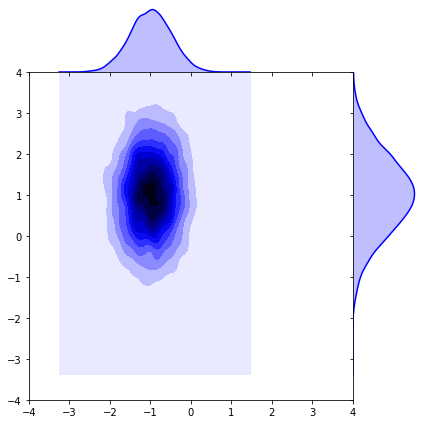

In [16]:
# Create a plot showing joint density contours and marginal density functions
samples = bivariate_normal_from_Independent.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind='kde', space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])
plt.show()

In [17]:
# Use MultivariateNormalDiag to create the equivalent distribution
# Note that diagonal covariance matrix => no correlation => independence 
# (for the multivariate normal distribution)
bivariate_normal_from_Multivariate = tfd.MultivariateNormalDiag(loc=locs, scale_diag=scales)
bivariate_normal_from_Multivariate

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

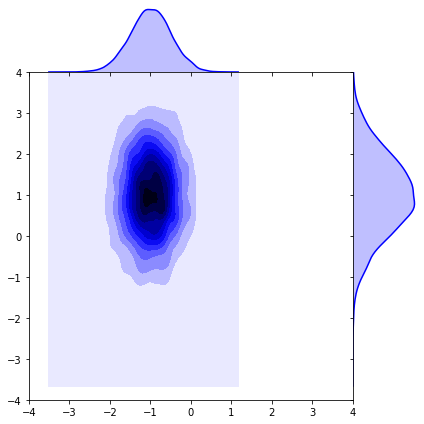

In [18]:
# Plot the joint density function of bivariate_normal_from_Independent
# Refer back to bivariate_normal_from_Independent to show that the plot is the same
# Summarize how Independent has been used
samples = bivariate_normal_from_Multivariate.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind='kde', space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])
plt.show()